# Figure 4

In [1]:
source(here::here("code/init.R"))

ℹ Parallelization enabled. Using 102 threads.



## Figure 4A

In [2]:
cluster_map <- fread(here("data/models/gastrulation_homogenization_cluster_map.csv"))

In [3]:
l <- readr::read_rds(here("data/models/homog_pssms_gastrulation.rds"))
homog_pssms <- l$homog_models
indiv_pssms <- l$indiv_models

In [4]:
model_traj_map <- c(
    "meso" = "Epi->Meso",
    "endo" = "Epi->Endo",
    "cnp" = "Epi->Ecto",
    "exe" = "Meso->Exe",
    "caud" = "Meso->Caudal-Meso",
    "card" = "Meso->Cardio-Meso"
)

pretty_pssm_logo <- function(...) {
    prego::plot_pssm_logo(...) + theme_arial_classic() + theme(axis.text.x = element_blank(), axis.title.x = element_blank(), axis.ticks.x = element_blank())
}
plot_clust_pssms <- function(indiv_pssms, homog_pssms, cluster_map, motif, rc = FALSE) {
    clust_df <- cluster_map %>%
        filter(clust_name == !!motif)

    pssm_plots <- purrr::map2(clust_df$motif, clust_df$model, ~ {
        model_idx <- as.numeric(gsub("m", "", .y))
        model_name <- names(indiv_pssms)[model_idx]
        pretty_pssm_logo(
            indiv_pssms[[model_name]][[.x]]$pssm,
            title = model_traj_map[c("meso", "endo", "cnp", "card", "caud", "exe")[model_idx]]
        )
    })

    h_pssm <- homog_pssms[[motif]]$pssm
    if (rc) {
        h_pssm <- pssm_rc(h_pssm)
    }
    homogen_plot <- pretty_pssm_logo(h_pssm, title = "Homogenized")
    pssm_plots <- c(pssm_plots, list(homogen_plot))
    return(pssm_plots)
}

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ggseqlogo package.
  Please report the issue at <https://github.com/omarwagih/ggseqlogo/issues>.”


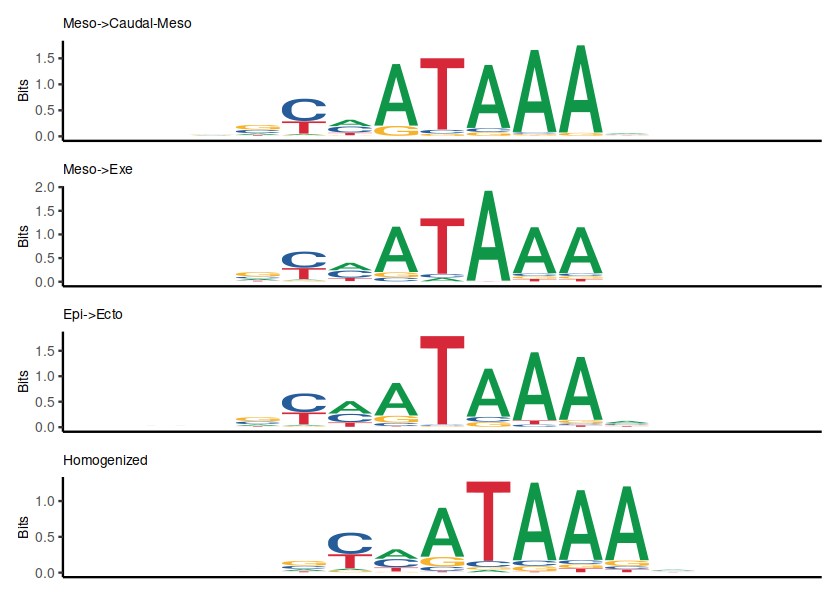

In [5]:
hox_name <- "m5.SCENIC.cisbp__M09581"
sps(7, 5)
plot_clust_pssms(indiv_pssms, homog_pssms, cluster_map, hox_name, rc = TRUE) %>% patchwork::wrap_plots(ncol = 1)

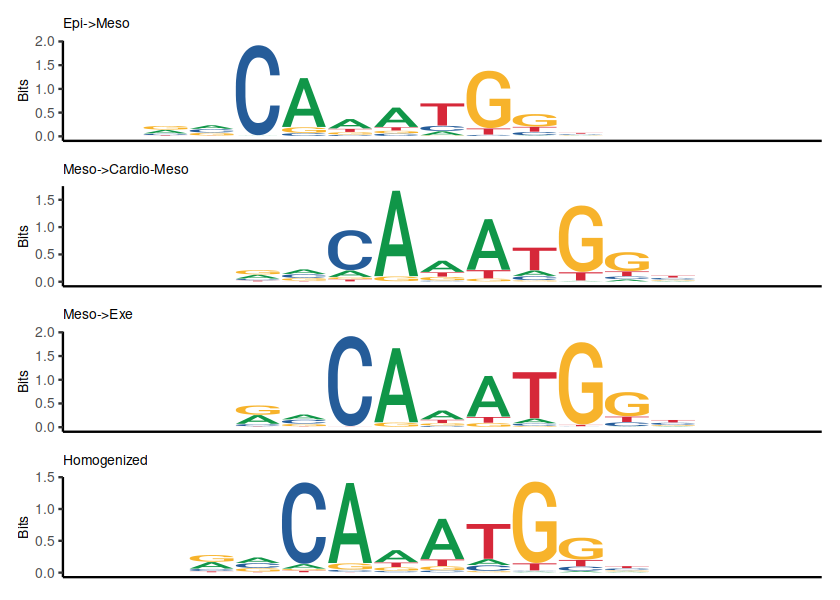

In [6]:
mesp_name <- "m1.SCENIC.taipale_cyt_meth__MESP2_NAMCATATGKYN_eDBD"
sps(7, 5)
plot_clust_pssms(indiv_pssms, homog_pssms, cluster_map, mesp_name) %>% patchwork::wrap_plots(ncol = 1)

## Figure 4B

In [7]:
before_e <- readr::read_rds(here("data/models/energies_before_homogenization_gastrulation.rds"))
after_e <- readr::read_rds(here("data/models/energies_after_homogenization_gastrulation.rds"))

In [8]:
names_key <-  c(
        m1.SCENIC.jaspar__MA0807.1 = "Eomes/Tbox", m1.JASPAR.Hnf1A = "Hnf1a",
        m1.SCENIC.cisbp__M02420 = "Dmrta2", m2.SCENIC.jaspar__MA0274.1 = "A__TGAAT",
        m2.SCENIC.elemento__GATAAGC = "Gata(m2)", m1.HOCOMOCO.SOX2_MOUSE.H11MO.0.A = "Nanog/Sox",
        m3.SCENIC.jaspar__MA1559.1 = "Snai(m1)", m3.SCENIC.taipale__GRHL1_DBD_NAACCGGTTN_repr = "Grhl1",
        m3.SCENIC.homer__YTGWCADY_Tgif1 = "Meis", m1.SCENIC.elemento__CACCTGG = "Snai",
        m1.SCENIC.homer__TAATTAGN_Lhx2 = "Lhx2/Emx", m4.SCENIC.stark__MATTRRCACNY = "Hoxb2_Tbx",
        m4.SCENIC.swissregulon__hs__EMX1 = "Emx1/Hox", m4.SCENIC.jaspar__MA0037.4 = "Gata3/6",
        m1.SCENIC.taipale_cyt_meth__MESP2_NAMCATATGKYN_eDBD = "Mesp2",
        m3.SCENIC.cisbp__M00198 = "Tcf", m6.SCENIC.flyfactorsurvey__br_Z2_FlyReg_FBgn0000210 = "CAAA",
        m1.HOCOMOCO.SMAD2_HUMAN.H11MO.0.A = "Smad4", m2.SCENIC.jaspar__MA0792.1 = "Pou3",
        m2.SCENIC.cisbp__M00794 = "GTAAACA", m2.JOLMA.FOXL1_di_full = "Foxl",
        m3.JASPAR.HAT1 = "Hnf1b", m3.SCENIC.hdpi__PDLIM5 = "Zic2", m2.SCENIC.cisbp__M00206 = "Sox",
        m6.SCENIC.jaspar__MA0406.1 = "Tead2", m2.JASPAR.Foxl2 = "Foxa2",
        m2.SCENIC.taipale_cyt_meth__FOXA2_NWNWGTMAATATTKRYNYWN_eDBD_meth_repr = "Foxb1",
        m2.SCENIC.nitta__da_TCGGGC40NAAT_KY_ACACSTGCA_m1_c2 = "Snai(m2)",
        m6.HOCOMOCO.ZIC3_MOUSE.H11MO.0.A = "Zic(m2)", m2.SCENIC.taipale_cyt_meth__POU4F3_NTATGCATAN_eDBD_meth_repr = "Pou",
        m4.SCENIC.taipale_cyt_meth__SIX3_NSSTATCRYN_eDBD = "Gata(m4)",
        m3.SCENIC.idmmpmm__oc = "Otx2", m3.SCENIC.cisbp__M01297 = "Nr2f1",
        m3.JASPAR.vfl = "Snai(m3)", m3.SCENIC.flyfactorsurvey__E5_SOLEXA_FBgn0008646 = "Hox(m3)",
        m3.SCENIC.predrem__nrMotif2327 = "TAAGCT", m5.SCENIC.cisbp__M09581 = "Hox(m5)",
        m3.HOMER.Tbx5 = "Tbx(m3)", m5.SCENIC.taipale__HOXC11_DBD_NGYAATWAAAN = "Cdx/Hox",
        m5.JASPAR.HOXC12 = "Cdx(m5)", m5.SCENIC.taipale_cyt_meth__PBX1_KTGATTGAYR_FL = "Hoxa1",
        m5.SCENIC.taipale_cyt_meth__DLX4_NTCGTTAN_eDBD_meth = "Sox3(m3)",
        m6.SCENIC.cisbp__M00787 = "Zic(m3)", m3.HOCOMOCO.CUX2_MOUSE.H11MO.0.C = "Meis1",
        m3.SCENIC.jaspar__MA0787.1 = "Pou(m4)", m4.JASPAR.ARF8 = "GA__A",
        m4.SCENIC.taipale__FOXL1_full_WRTAAAYAAACAA = "Foxp", m4.SCENIC.cisbp__M00779 = "Glis",
        m4.JASPAR.achi = "Meis(m4)", m4.SCENIC.swissregulon__mm__Snai2 = "Snai(m4)",
        m4.SCENIC.cisbp__M00988 = "Znf296?", m4.SCENIC.cisbp__M00002 = "ACACCC",
        m5.SCENIC.homer__CHCAGCRGGRGG_Zic2 = "Zic(m4)", m5.SCENIC.cisbp__M01653 = "ACG",
        m5.SCENIC.hocomoco__MESP1_HUMAN.H11MO.0.D = "Mesp(m4)", m6.HOMER.Smad4 = "Smad(m6)",
        m3.SCENIC.jaspar__MA0200.1 = "Lhx", m5.SCENIC.jaspar__MA0668.2 = "Msgn1",
        m6.SCENIC.predrem__nrMotif65 = "Hand1", m6.SCENIC.hdpi__TFEB = "Snai(m6)",
        m6.SCENIC.taipale_cyt_meth__ZIC4_NRCCMCCYGYNGYGN_eDBD_repr = "Zic(m6)"
    )

chosen <- c(
    "m1.SCENIC.jaspar__MA0807.1", "m1.JASPAR.Hnf1A", "m1.SCENIC.cisbp__M02420",
    "m3.JASPAR.HAT1", "m3.SCENIC.hdpi__PDLIM5", "m2.SCENIC.elemento__GATAAGC",
    "m6.SCENIC.jaspar__MA0406.1", "m6.HOCOMOCO.ZIC3_MOUSE.H11MO.0.A",
    "m1.HOCOMOCO.SOX2_MOUSE.H11MO.0.A", "m3.HOCOMOCO.CUX2_MOUSE.H11MO.0.C",
    "m3.SCENIC.idmmpmm__oc", "m3.SCENIC.cisbp__M01297", "m3.JASPAR.vfl",
    "m3.SCENIC.jaspar__MA0787.1", "m3.SCENIC.flyfactorsurvey__E5_SOLEXA_FBgn0008646",
    "m5.SCENIC.cisbp__M09581", "m1.SCENIC.homer__TAATTAGN_Lhx2",
    "m4.SCENIC.taipale__FOXL1_full_WRTAAAYAAACAA", "m4.SCENIC.cisbp__M00779",
    "m4.SCENIC.stark__MATTRRCACNY", "m1.SCENIC.taipale_cyt_meth__MESP2_NAMCATATGKYN_eDBD",
    "m5.JASPAR.HOXC12", "m3.SCENIC.cisbp__M00198", "m1.HOCOMOCO.SMAD2_HUMAN.H11MO.0.A",
    "m2.SCENIC.jaspar__MA0792.1"
)

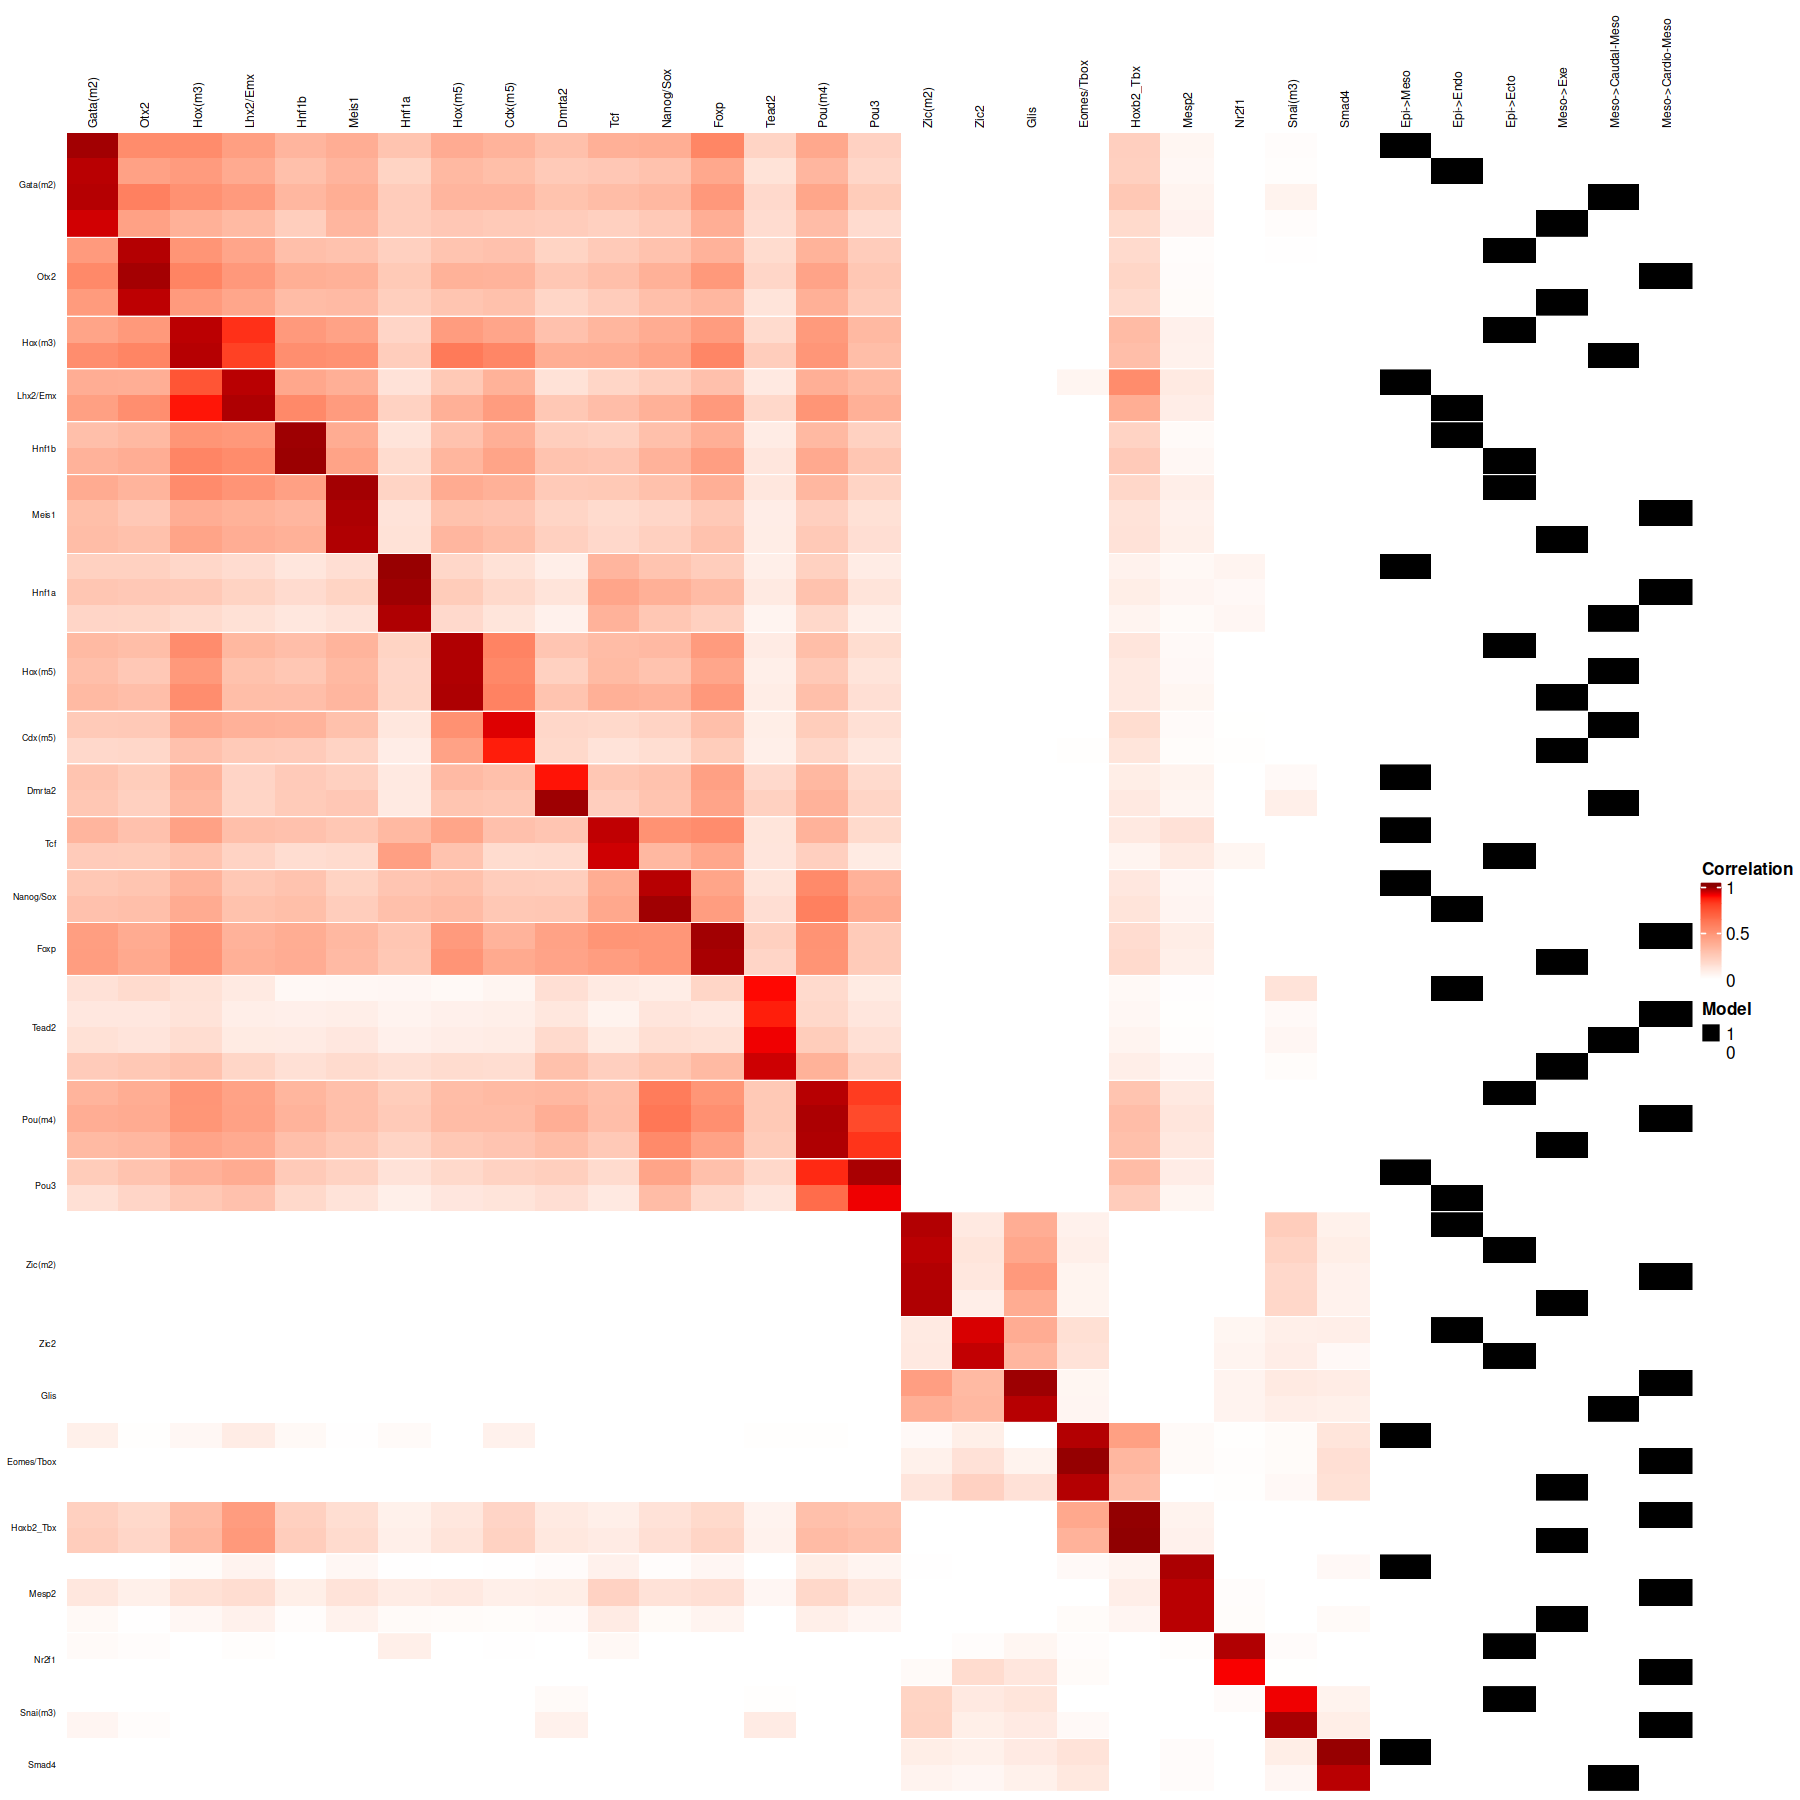

In [9]:
set_plot_size(15, 15)
mat <- tgs_cor(before_e, after_e)
hc_col <- hclust(dist(1 - t(mat)), method = "ward.D2")
mat <- mat[, hc_col$order]
mat <- mat[order(apply(mat, 1, which.max)), ]
cmap <- cluster_map %>%
    mutate(model = gsub("m", "", model) %>% as.numeric()) %>%
    mutate(model = c("meso", "endo", "cnp", "card", "caud", "exe")[model]) %>%
    mutate(feat = paste0(model, ".", motif)) %>%
    filter(clust_name %in% chosen) %>%
    mutate(name = names_key[clust_name]) %>%
    mutate(new_name = paste0(model, ": ", name)) %>%
    column_to_rownames("feat")
row_split <- forcats::fct_inorder(cmap[rownames(mat), ]$name)

model_mat <- matrix(0, nrow = nrow(mat), ncol = length(model_traj_map))
rownames(model_mat) <- rownames(mat)
colnames(model_mat) <- model_traj_map
for (i in 1:nrow(mat)) {
    model_mat[i, model_traj_map[cmap[rownames(mat)[i], ]$model]] <- 1
}
colnames(mat) <- names_key[colnames(mat)]
rownames(mat) <- cmap[rownames(mat), ]$new_name
rownames(model_mat) <- cmap[rownames(mat), ]$new_name

model_hm <- ComplexHeatmap::Heatmap(model_mat, name = "Model", col = c("white", "black"), show_row_names = FALSE, show_column_names = TRUE, cluster_rows = FALSE, cluster_columns = FALSE, row_split = row_split, cluster_row_slices = FALSE, column_names_side = "top", column_title_side = "top", row_title_side = "left", row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7), use_raster = TRUE, row_title_rot = 0, row_gap = unit(0.2, "mm"))

hm <- ComplexHeatmap::Heatmap(mat, name = "Correlation", col = circlize::colorRamp2(c(0, 0.9, 1), c("white", "red", "darkred")), show_row_names = FALSE, show_column_names = TRUE, cluster_rows = FALSE, cluster_columns = FALSE, row_split = row_split, cluster_row_slices = FALSE, column_names_side = "top", column_title_side = "top", row_title_side = "left", row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5), column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7), use_raster = TRUE, row_gap = unit(0.2, "mm"), row_title_rot = 0)


hm + model_hm

## Figure 4C

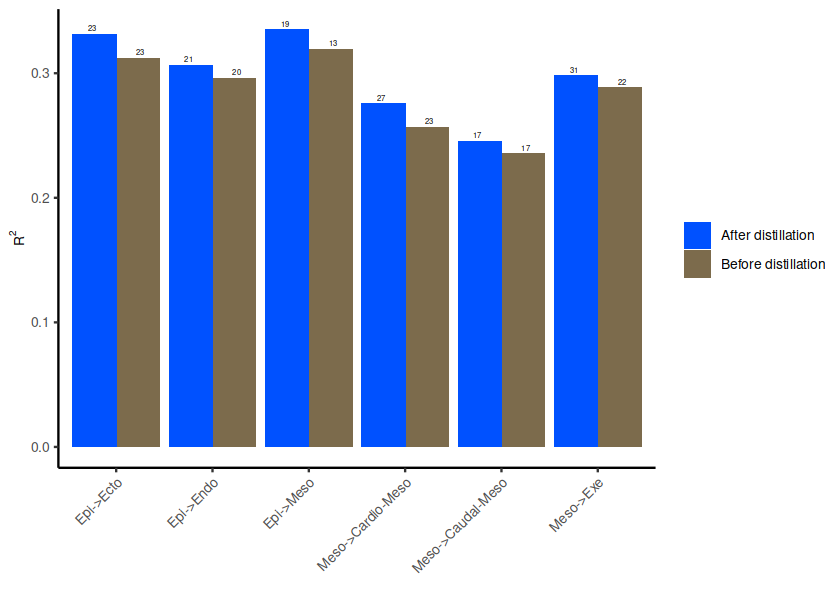

In [10]:
r2_stats <- fread(here("data/stats/homogenization_r2_stats_gastrulation.csv"))
sps(7, 5)
p <- r2_stats %>%
    ggplot(aes(x = traj, y = r2_test, fill = type, label = n)) +
    geom_col(position = "dodge") +
    labs(x = "", y = expression(R^2)) +
    geom_text(position = position_dodge(width = 1), vjust = -0.5, family = "ArialMT", size = 1.5) +
    scale_fill_manual(name = "", values = c("Before distillation" = "#7c6b4c", "After distillation" = "#0051ff")) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))

p

## Figure 4D

Loading required package: grid

ComplexHeatmap version 2.25.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




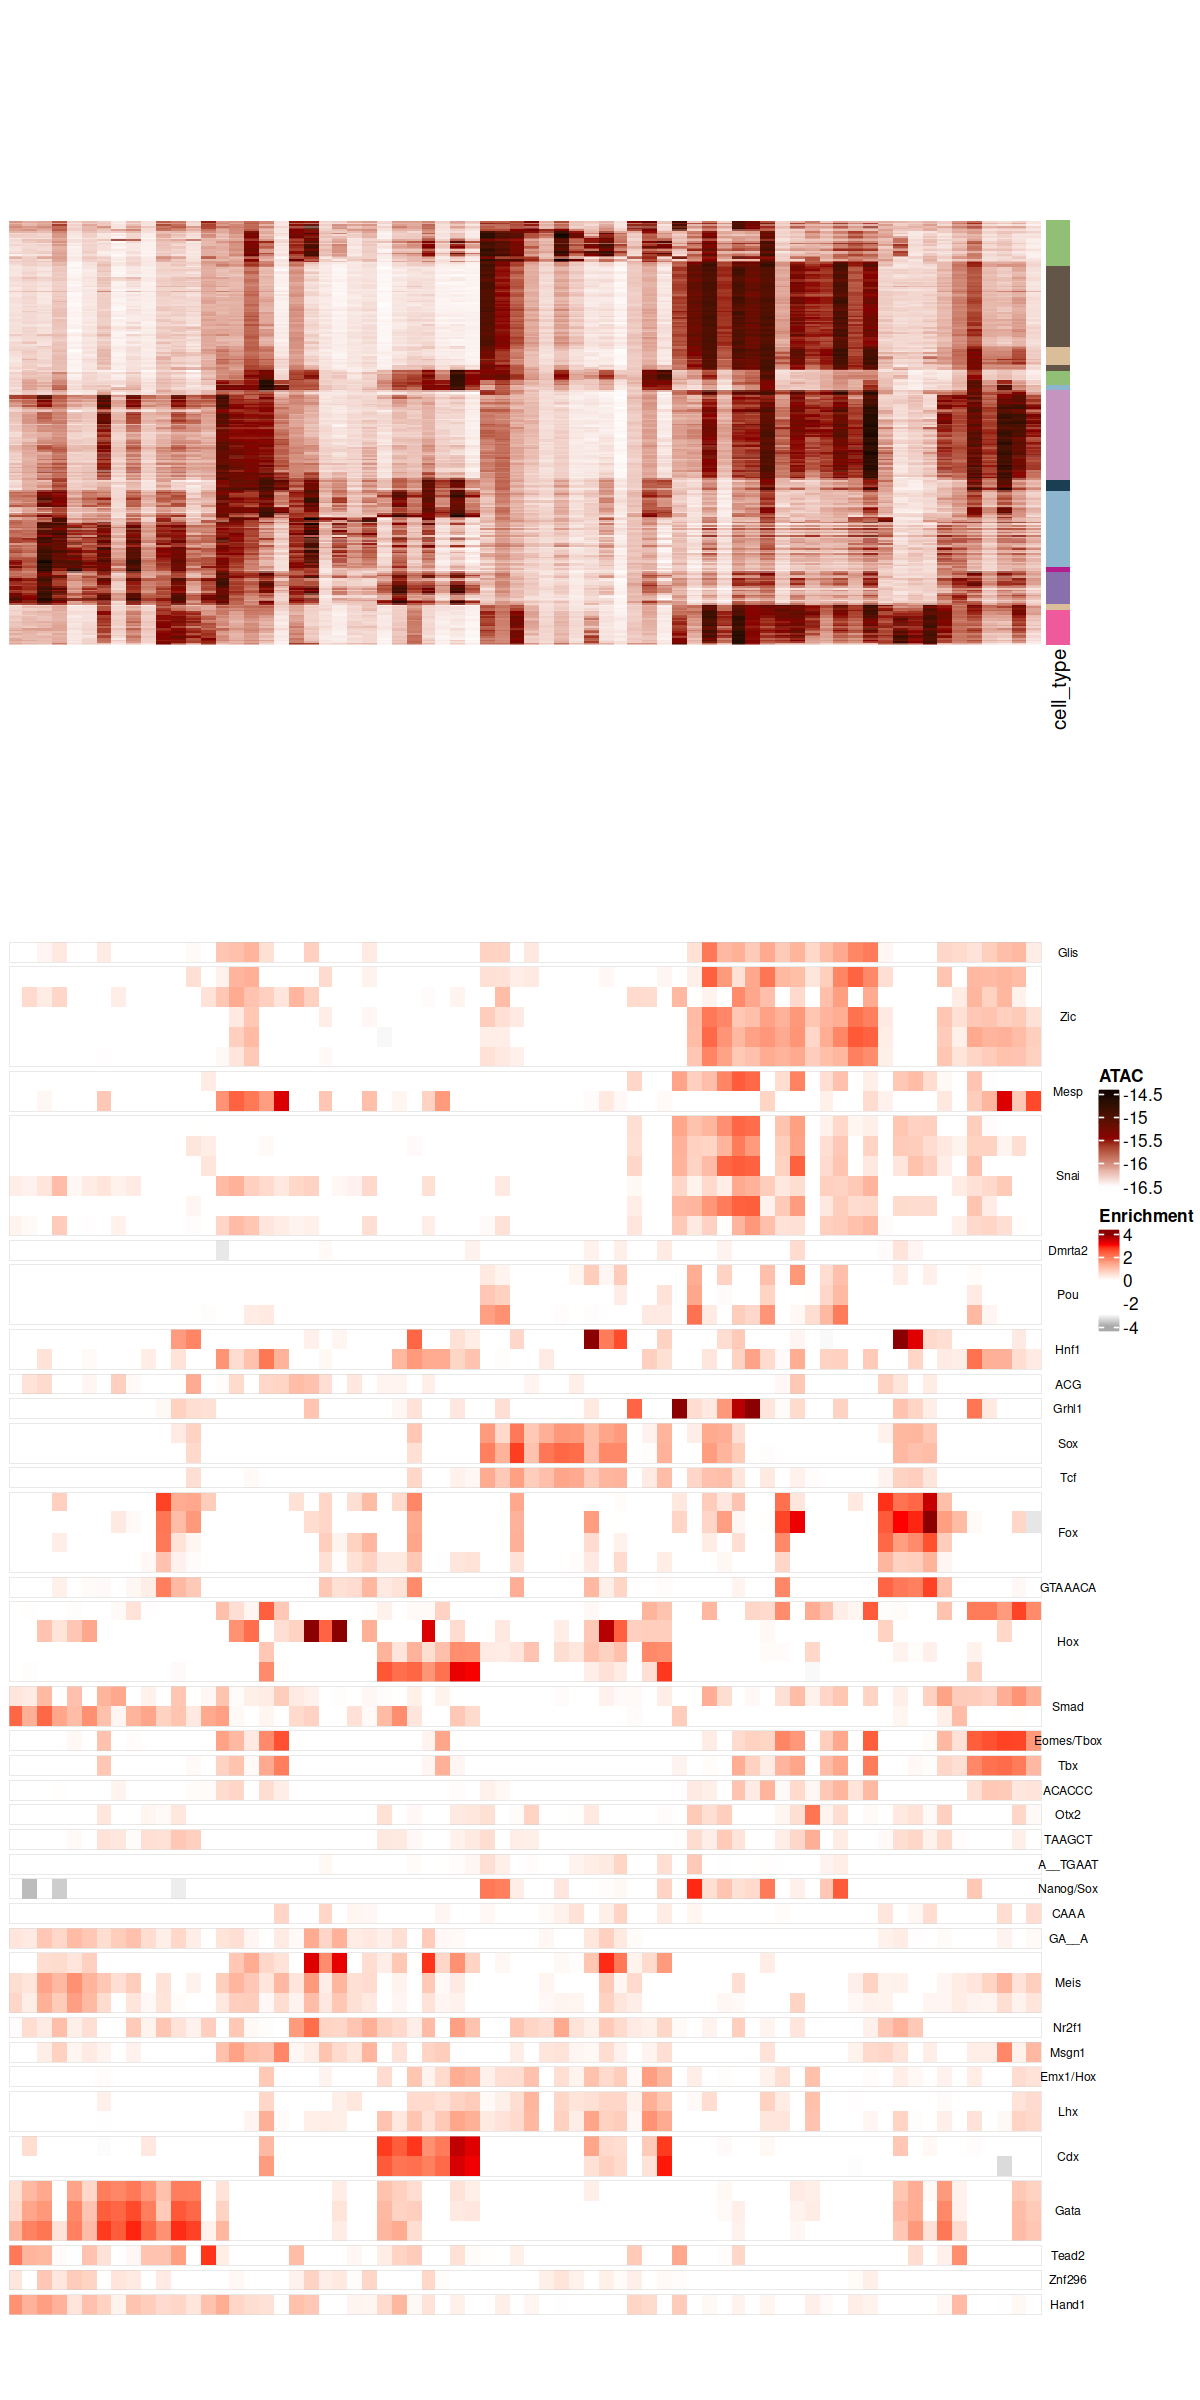

In [11]:
fig4d_dir <- here("data/fig4d")
stopifnot(dir.exists(fig4d_dir))
library(ComplexHeatmap)

crecl_egc <- readr::read_rds(here("data/fig4d/crecl_egc.rds"))
crecl_order <- readr::read_rds(here("data/fig4d/crecl_order.rds"))
md_f <- readr::read_rds(here("data/fig4d/md_f.rds"))
enrich_mat <- readr::read_rds(here("data/fig4d/enrich_mat.rds"))
plot_mat <- readr::read_rds(here("data/fig4d/plot_mat.rds"))
motif_ord_df <- readr::read_rds(here("data/fig4d/motif_ord_df.rds"))
ct_to_lin_col <- readr::read_rds(here("data/fig4d/ct_to_lin_col.rds"))

set_plot_size(10, 20)
ct_annot <- ComplexHeatmap::rowAnnotation(cell_type = md_f$cell_type, col = list(cell_type = ct_to_lin_col), show_legend = FALSE)
hm_atac <- ComplexHeatmap::Heatmap(t(crecl_egc[crecl_order, ]),
    name = "ATAC", cluster_rows = FALSE, cluster_columns = FALSE, show_row_names = FALSE, show_column_names = FALSE,
    col = c("white", "darkred", "black"),
    right_annotation = ct_annot,
    height = unit(0.5, "npc"),
    row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5),
    column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5),
    row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 5),
    column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
    use_raster = TRUE
)

row_groups <- motif_ord_df$group
hm_energy <- ComplexHeatmap::Heatmap(
    t(plot_mat),
    name = "Enrichment",
    cluster_rows = FALSE,
    cluster_columns = FALSE,
    show_row_names = FALSE,
    show_column_names = FALSE,
    column_names_side = "top",
    col = circlize::colorRamp2(c(-4, -3, 0, 3, 4), c("darkgray", "white", "white", "red", "darkred")),
    height = unit(0.9, "npc"),
    row_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
    column_title_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
    row_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
    column_names_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7),
    use_raster = TRUE,
    row_split = row_groups,
    row_title = NULL,
    right_annotation = ComplexHeatmap::rowAnnotation(
        group = ComplexHeatmap::anno_block(
            gp = grid::gpar(fill = NA, col = NA),
            labels = levels(row_groups),
            labels_rot = 0, labels_gp = grid::gpar(fontfamily = "ArialMT", fontsize = 7)
        )
    ),
    border = TRUE,
    border_gp = grid::gpar(col = "gray", lwd = 0.2)
)

hm_atac %v% hm_energy

### Figure S6A

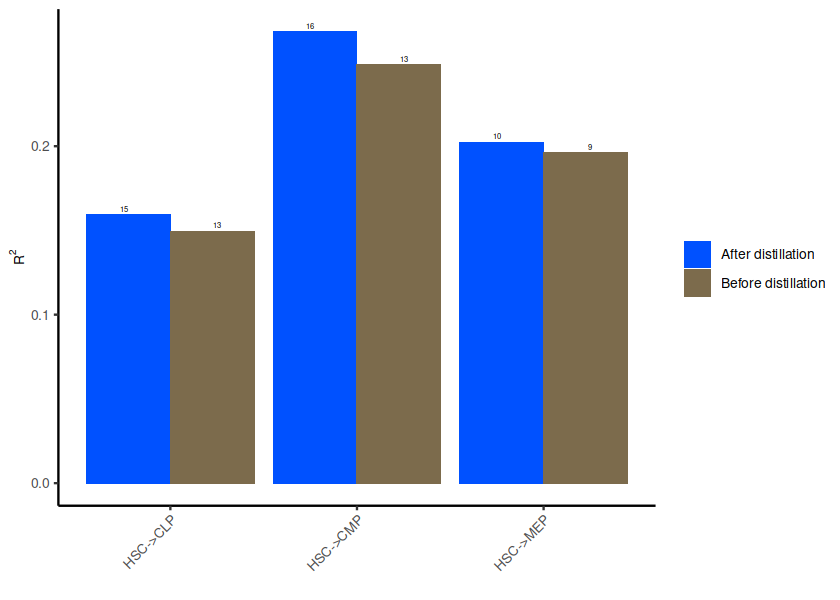

In [12]:
r2_stats_bm <- fread(here("data/stats/homogenization_r2_stats_bm.csv"))
sps(7, 5)
p <- r2_stats_bm %>%
    mutate(
        type = case_when(
            type == "Single trajectory" ~ "Before distillation",
            type == "Full manifold + Filtered" ~ "After distillation",
            TRUE ~ NA
        )
    ) %>%
    filter(!is.na(type)) %>%
    ggplot(aes(x = traj, y = r2_test, fill = type, label = n)) +
    geom_col(position = "dodge") +
    labs(x = "", y = expression(R^2)) +
    geom_text(position = position_dodge(width = 1), vjust = -0.5, family = "ArialMT", size = 1.5) +
    scale_fill_manual(name = "", values = c("Before distillation" = "#7c6b4c", "After distillation" = "#0051ff")) +
    theme(axis.text.x = ggplot2::element_text(angle = 45, hjust = 1))

p